# AutoEncoder
Work in progress...

In [3]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

In [8]:
import tsod

<AxesSubplot:>

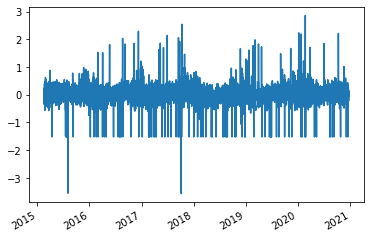

In [9]:
file_path = os.path.join("..", "tests", "data", "Ballen_20150218-20201222.csv")
df = pd.read_csv(file_path, index_col=0, parse_dates=True)
data = df.water_level
data.plot()

In [10]:
range_anomalies = tsod.RangeDetector(-1, 1.3).detect(data)
data_clean = data.copy()
data_clean[range_anomalies.values] = np.nan

In [11]:
from tsod.autoencoders import AutoEncoder
from tsod.features import lag_time_series

normal_data = data_clean["2015"].interpolate()  # fill gaps in chosen "normal" data period
max_lag = 100  # window_size
normal_data_lagged_features = lag_time_series(normal_data, lags=range(max_lag)).dropna() # TODO put in pipeline

detector = AutoEncoder(epochs=20) # hidden_neurons=[max_lag, 3, 3, max_lag]

detector.fit(normal_data_lagged_features)

data_lagged_features = lag_time_series(data.interpolate(), lags=range(max_lag)).dropna()

anomalies = detector.detect(data_lagged_features) == 1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                6464      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2